In [1]:
from tensorflow.keras.models import Sequential, load_model
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, Flatten, Reshape, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from sklearn.model_selection import KFold
from tensorflow.keras.datasets import fashion_mnist, mnist
from tensorflow.keras.utils import plot_model
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

2022-10-25 20:58:26.942852: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-25 20:58:27.106322: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-25 20:58:27.827597: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-10-25 20:58:27.827654: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or 

In [2]:
(X_train,Y_train),(X_test,Y_test) = fashion_mnist.load_data()
Y_train = pd.get_dummies(Y_train).values
Y_test = pd.get_dummies(Y_test).values

X_train=X_train.astype(float)/255
X_test=X_test.astype(float)/255
X_train = X_train.reshape(-1,28,28,1)
X_test =  X_test.reshape(-1,28,28,1)

In [3]:
model = Sequential()
model.add(Input(shape=(28,28,1)))
model.add(Conv2D(filters=6, kernel_size=(4,4), activation='sigmoid',padding='same')) 
model.add(MaxPooling2D(pool_size=(2,2), strides=2))
model.add(Conv2D(filters=10, kernel_size=(3,3), activation='sigmoid',padding='valid'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, ))
model.add(Conv2D(filters=16, kernel_size=(2,2), activation='sigmoid',padding='valid'))
model.add(Flatten())
model.add(Dense(120, activation='sigmoid'))
model.add(Dense(84, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

2022-10-25 20:58:34.527621: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-25 20:58:34.537167: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-25 20:58:34.537458: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-25 20:58:34.538037: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

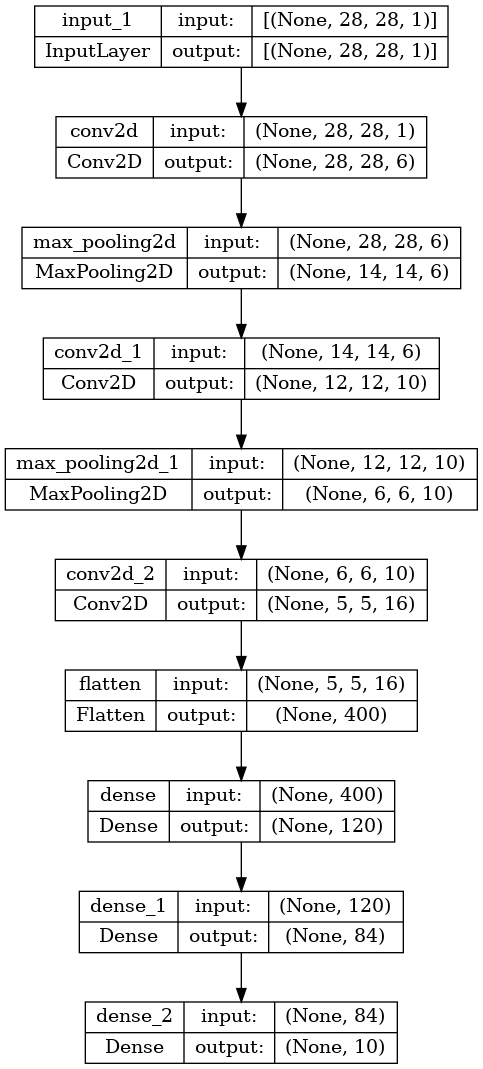

In [4]:
plot_model(model, 'weight_modified2.png', show_shapes=True)

In [47]:
mf = model.fit(X_train, Y_train, batch_size=32, epochs=100, validation_data=(X_test, Y_test), verbose=2)

Epoch 1/100
1875/1875 - 6s - loss: 1.0852 - accuracy: 0.5921 - val_loss: 0.6578 - val_accuracy: 0.7452 - 6s/epoch - 3ms/step
Epoch 2/100
1875/1875 - 5s - loss: 0.5821 - accuracy: 0.7740 - val_loss: 0.5565 - val_accuracy: 0.7872 - 5s/epoch - 3ms/step
Epoch 3/100
1875/1875 - 5s - loss: 0.5018 - accuracy: 0.8099 - val_loss: 0.4993 - val_accuracy: 0.8111 - 5s/epoch - 3ms/step
Epoch 4/100
1875/1875 - 5s - loss: 0.4475 - accuracy: 0.8332 - val_loss: 0.4666 - val_accuracy: 0.8229 - 5s/epoch - 3ms/step
Epoch 5/100
1875/1875 - 5s - loss: 0.4128 - accuracy: 0.8470 - val_loss: 0.4239 - val_accuracy: 0.8411 - 5s/epoch - 3ms/step
Epoch 6/100
1875/1875 - 6s - loss: 0.3887 - accuracy: 0.8552 - val_loss: 0.4001 - val_accuracy: 0.8512 - 6s/epoch - 3ms/step
Epoch 7/100
1875/1875 - 5s - loss: 0.3693 - accuracy: 0.8632 - val_loss: 0.4221 - val_accuracy: 0.8426 - 5s/epoch - 3ms/step
Epoch 8/100
1875/1875 - 5s - loss: 0.3535 - accuracy: 0.8676 - val_loss: 0.3744 - val_accuracy: 0.8594 - 5s/epoch - 3ms/step


In [48]:
weight = model.get_weights()
np.savetxt('weight_modified2.csv' , weight , fmt='%s', delimiter=',')

/home/pancrackhead/anaconda3/lib/python3.9/site-packages/numpy/lib/npyio.py:1378: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.asarray(X)


In [49]:
history  = mf.history

In [50]:
# np.argmax(acc_test)
acc_test[55]


0.911899983882904

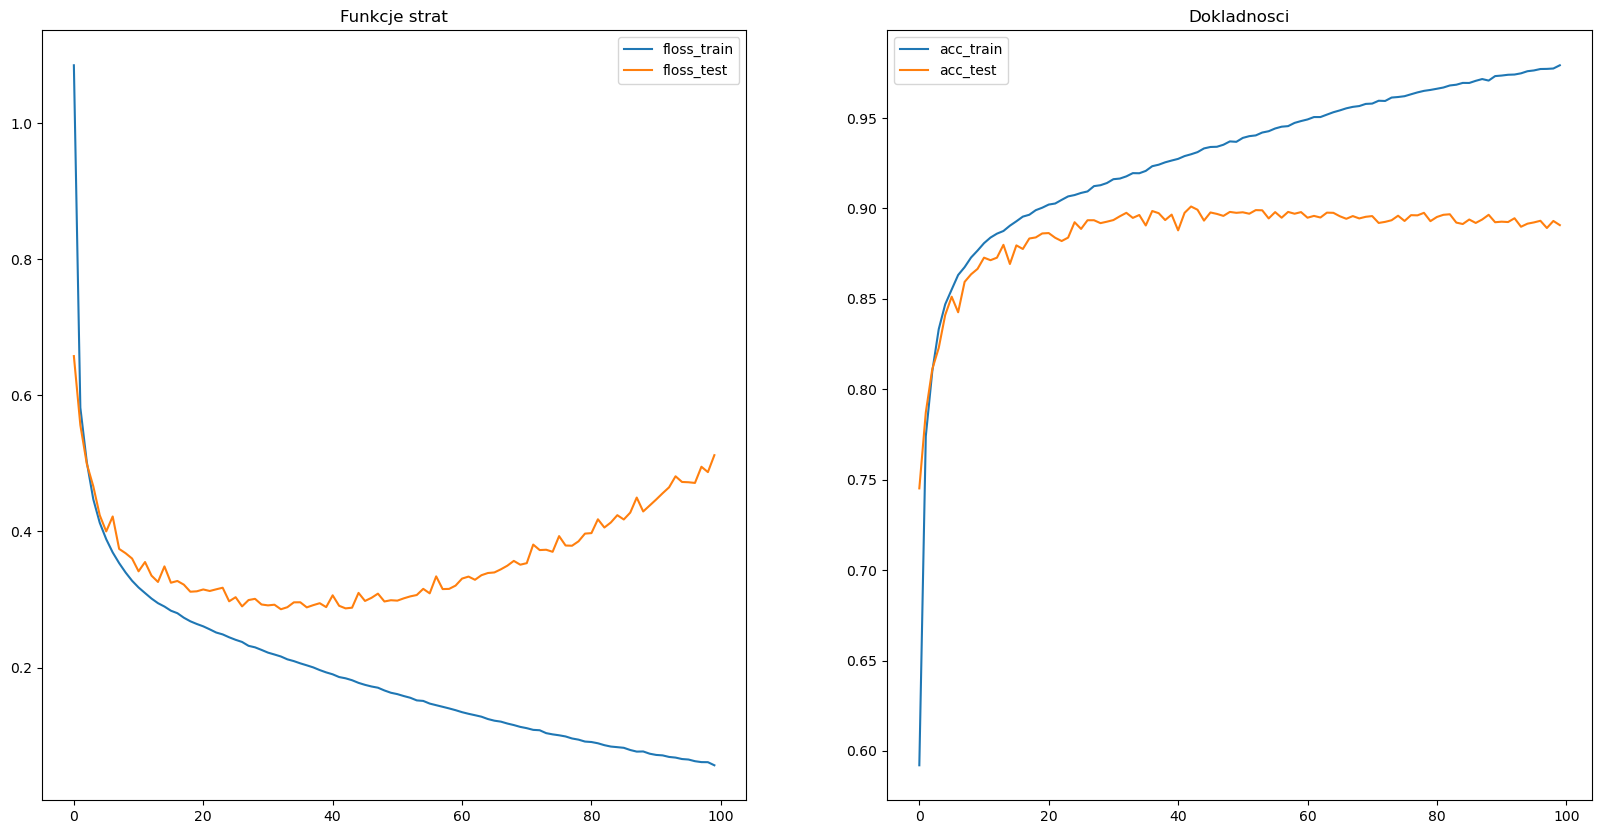

In [51]:
historia = model.history.history
floss_train = historia['loss']
floss_test = historia['val_loss']
acc_train = historia['accuracy']
acc_test = historia['val_accuracy']
fig,ax = plt.subplots(1,2, figsize=(20,10))
epochs = np.arange(0, 100)
ax[0].plot(epochs, floss_train, label = 'floss_train')
ax[0].plot(epochs, floss_test, label = 'floss_test')
ax[0].set_title('Funkcje strat')
ax[0].legend()
ax[1].set_title('Dokladnosci')
ax[1].plot(epochs, acc_train, label = 'acc_train')
ax[1].plot(epochs, acc_test, label = 'acc_test')
ax[1].legend()

plt.savefig('accuracy_los_modified2.png')
plt.show()